In [1]:
# import as bibliotecas importantes
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from scipy import stats

In [2]:
df = pd.read_csv('../data/commits_transformed_new.csv', 
                 index_col='date', 
                 parse_dates=['date'],
                 infer_datetime_format=True)

In [3]:
df.shape

(601077, 75)

In [4]:
seed = 7
array = df.values
X = array[:,0:74]
Y = array[:,74]
validation_size = 0.33
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [5]:
scoring = 'roc_auc'

In [6]:
# modelos que serão treinados
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', LinearSVC()))
models.append(('RF', RandomForestClassifier()))
models.append

results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

LR: 0.516411 (0.003048)
KNN: 0.637246 (0.001275)
CART: 0.568734 (0.001130)
NB: 0.568945 (0.001481)


/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increa

SVM: 0.504439 (0.039333)


/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF: 0.649132 (0.000824)


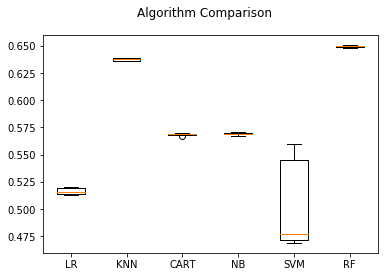

In [7]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
fig.savefig('baseline-algorithms.png')

In [20]:
dtc = LogisticRegression()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Acurácia
0.679051805844038

Matrix de Confusão

[[134694      0]
 [ 63662      0]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81    134694
         1.0       0.00      0.00      0.00     63662

   micro avg       0.68      0.68      0.68    198356
   macro avg       0.34      0.50      0.40    198356
weighted avg       0.46      0.68      0.55    198356



/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
dtc = LinearDiscriminantAnalysis()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Acurácia
0.6887969106051746

Matrix de Confusão

[[132746   1948]
 [ 59781   3881]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.69      0.99      0.81    134694
         1.0       0.67      0.06      0.11     63662

   micro avg       0.69      0.69      0.69    198356
   macro avg       0.68      0.52      0.46    198356
weighted avg       0.68      0.69      0.59    198356



In [22]:
dtc = KNeighborsClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

Acurácia
0.6674060779608381

Matrix de Confusão

[[109032  25662]
 [ 40310  23352]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77    134694
         1.0       0.48      0.37      0.41     63662

   micro avg       0.67      0.67      0.67    198356
   macro avg       0.60      0.59      0.59    198356
weighted avg       0.65      0.67      0.65    198356



In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

Acurácia
0.6233186795458671

Matrix de Confusão

[[96933 37761]
 [36956 26706]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72    134694
         1.0       0.41      0.42      0.42     63662

   micro avg       0.62      0.62      0.62    198356
   macro avg       0.57      0.57      0.57    198356
weighted avg       0.62      0.62      0.62    198356



In [24]:
svn = GaussianNB()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

Acurácia
0.3335971687269354

Matrix de Confusão

[[  3493 131201]
 [   984  62678]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.78      0.03      0.05    134694
         1.0       0.32      0.98      0.49     63662

   micro avg       0.33      0.33      0.33    198356
   macro avg       0.55      0.51      0.27    198356
weighted avg       0.63      0.33      0.19    198356



In [25]:
svn = LinearSVC()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Acurácia
0.34844421141785475

Matrix de Confusão

[[  7023 127671]
 [  1569  62093]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.82      0.05      0.10    134694
         1.0       0.33      0.98      0.49     63662

   micro avg       0.35      0.35      0.35    198356
   macro avg       0.57      0.51      0.29    198356
weighted avg       0.66      0.35      0.22    198356



In [26]:
knn = RandomForestClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Acurácia
0.6809171388816068

Matrix de Confusão

[[115329  19365]
 [ 43927  19735]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.72      0.86      0.78    134694
         1.0       0.50      0.31      0.38     63662

   micro avg       0.68      0.68      0.68    198356
   macro avg       0.61      0.58      0.58    198356
weighted avg       0.65      0.68      0.66    198356

